<a href="https://colab.research.google.com/github/iparth0611/ALY6110_Module4Assignment/blob/main/ALY6110_Module4Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [7]:
import pandas as pd
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [9]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b'"","TV","Radio","Newspaper","Sales"\r\n"1",230.1,37.8,69.2,22.1\r\n"2",44.5,39.3,45.1,10.4\r\n"3",17.2,45.9,69.3,9.3\r\n"4",151.5,41.3,58.5,18.5\r\n"5",180.8,10.8,58.4,12.9\r\n"6",8.7,48.9,75,7.2\r\n"7",57.5,32.8,23.5,11.8\r\n"8",120.2,19.6,11.6,13.2\r\n"9",8.6,2.1,1,4.8\r\n"10",199.8,2.6,21.2,10.6\r\n"11",66.1,5.8,24.2,8.6\r\n"12",214.7,24,4,17.4\r\n"13",23.8,35.1,65.9,9.2\r\n"14",97.5,7.6,7.2,9.7\r\n"15",204.1,32.9,46,19\r\n"16",195.4,47.7,52.9,22.4\r\n"17",67.8,36.6,114,12.5\r\n"18",281.4,39.6,55.8,24.4\r\n"19",69.2,20.5,18.3,11.3\r\n"20",147.3,23.9,19.1,14.6\r\n"21",218.4,27.7,53.4,18\r\n"22",237.4,5.1,23.5,12.5\r\n"23",13.2,15.9,49.6,5.6\r\n"24",228.3,16.9,26.2,15.5\r\n"25",62.3,12.6,18.3,9.7\r\n"26",262.9,3.5,19.5,12\r\n"27",142.9,29.3,12.6,15\r\n"28",240.1,16.7,22.9,15.9\r\n"29",248.8,27.1,22.9,18.9\r\n"30",70.6,16,40.8,10.5\r\n"31",292.9,28.3,43.2,21.4\r\n"32",112.9,17.4,38.6,11.9\r\n"33",97.2,1.5,30,9.6\r\n"34",265.6,20,0.3,17.4\r\n"35",95.7,1.4,7.4,9.5\r

In [24]:
Ad= spark.read.csv('Advertising.csv',inferSchema=True, header=True)

In [26]:
Ad.show(10)

+---+-----+-----+---------+-----+
|_c0|   TV|Radio|Newspaper|Sales|
+---+-----+-----+---------+-----+
|  1|230.1| 37.8|     69.2| 22.1|
|  2| 44.5| 39.3|     45.1| 10.4|
|  3| 17.2| 45.9|     69.3|  9.3|
|  4|151.5| 41.3|     58.5| 18.5|
|  5|180.8| 10.8|     58.4| 12.9|
|  6|  8.7| 48.9|     75.0|  7.2|
|  7| 57.5| 32.8|     23.5| 11.8|
|  8|120.2| 19.6|     11.6| 13.2|
|  9|  8.6|  2.1|      1.0|  4.8|
| 10|199.8|  2.6|     21.2| 10.6|
+---+-----+-----+---------+-----+
only showing top 10 rows



In [11]:
Ad.show(10)

+---+-----+-----+---------+-----+
|_c0|   TV|Radio|Newspaper|Sales|
+---+-----+-----+---------+-----+
|  1|230.1| 37.8|     69.2| 22.1|
|  2| 44.5| 39.3|     45.1| 10.4|
|  3| 17.2| 45.9|     69.3|  9.3|
|  4|151.5| 41.3|     58.5| 18.5|
|  5|180.8| 10.8|     58.4| 12.9|
|  6|  8.7| 48.9|     75.0|  7.2|
|  7| 57.5| 32.8|     23.5| 11.8|
|  8|120.2| 19.6|     11.6| 13.2|
|  9|  8.6|  2.1|      1.0|  4.8|
| 10|199.8|  2.6|     21.2| 10.6|
+---+-----+-----+---------+-----+
only showing top 10 rows



In [20]:
Ad.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
Ad.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- TV: double (nullable = true)
 |-- Radio: double (nullable = true)
 |-- Newspaper: double (nullable = true)
 |-- Sales: double (nullable = true)



In [13]:
Ad = Ad.withColumnRenamed("_c0", "Index")

# Printing to show the change in column name
Ad.describe().show(5)

+-------+------------------+-----------------+------------------+------------------+------------------+
|summary|             Index|               TV|             Radio|         Newspaper|             Sales|
+-------+------------------+-----------------+------------------+------------------+------------------+
|  count|               200|              200|               200|               200|               200|
|   mean|             100.5|         147.0425|23.264000000000024|30.553999999999995|14.022500000000003|
| stddev|57.879184513951124|85.85423631490805|14.846809176168728| 21.77862083852283| 5.217456565710477|
|    min|                 1|              0.7|               0.0|               0.3|               1.6|
|    max|               200|            296.4|              49.6|             114.0|              27.0|
+-------+------------------+-----------------+------------------+------------------+------------------+



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

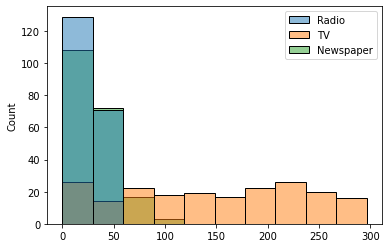

In [15]:
sns.histplot(Ad.select('Radio','TV','Newspaper').toPandas(), bins = 10)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


+------------------+-------------------+
|   skewness(Sales)|    kurtosis(Sales)|
+------------------+-------------------+
|0.4045082487061196|-0.4285695342675693|
+------------------+-------------------+



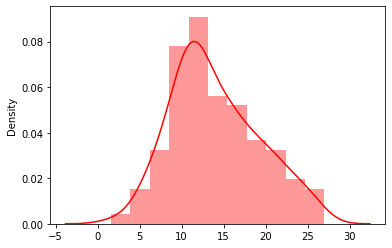

In [30]:
#Checking normal distribution of selected fetures
#Sales
sns.distplot(Ad.select('Sales').toPandas(), color="red")
Ad.select(F.skewness('Sales'), F.kurtosis('Sales')).show()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

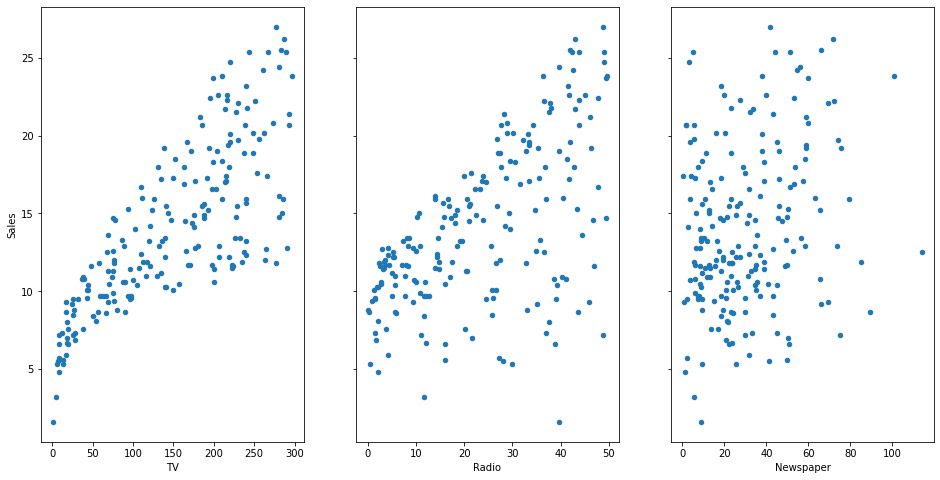

In [32]:
Ad=Ad.toPandas()
fig,axs= plt.subplots(1,3,sharey=True) 
Ad.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
Ad.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
Ad.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))
plt.show()

In [42]:
for i in Ad.columns:
    print(i+':',Ad[Ad[i].isNull()].count())

Index: 0
TV: 0
Radio: 0
Newspaper: 0
Sales: 0


In [41]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula = "Sales ~  TV + Radio + Newspaper")
fittedRF = supervised.fit(Ad)
preparedDF = fittedRF.transform(Ad)
preparedDF.show(5, False)

+-----+-----+-----+---------+-----+-----------------+-----+
|Index|TV   |Radio|Newspaper|Sales|features         |label|
+-----+-----+-----+---------+-----+-----------------+-----+
|1    |230.1|37.8 |69.2     |22.1 |[230.1,37.8,69.2]|22.1 |
|2    |44.5 |39.3 |45.1     |10.4 |[44.5,39.3,45.1] |10.4 |
|3    |17.2 |45.9 |69.3     |9.3  |[17.2,45.9,69.3] |9.3  |
|4    |151.5|41.3 |58.5     |18.5 |[151.5,41.3,58.5]|18.5 |
|5    |180.8|10.8 |58.4     |12.9 |[180.8,10.8,58.4]|12.9 |
+-----+-----+-----+---------+-----+-----------------+-----+
only showing top 5 rows



In [43]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler()\
    .setInputCols(["TV","Radio", "Newspaper"])\
    .setOutputCol("va_features")

va.transform(preparedDF).show(5)

+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
|Index|   TV|Radio|Newspaper|Sales|         features|label|      va_features|
+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
|    1|230.1| 37.8|     69.2| 22.1|[230.1,37.8,69.2]| 22.1|[230.1,37.8,69.2]|
|    2| 44.5| 39.3|     45.1| 10.4| [44.5,39.3,45.1]| 10.4| [44.5,39.3,45.1]|
|    3| 17.2| 45.9|     69.3|  9.3| [17.2,45.9,69.3]|  9.3| [17.2,45.9,69.3]|
|    4|151.5| 41.3|     58.5| 18.5|[151.5,41.3,58.5]| 18.5|[151.5,41.3,58.5]|
|    5|180.8| 10.8|     58.4| 12.9|[180.8,10.8,58.4]| 12.9|[180.8,10.8,58.4]|
+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
only showing top 5 rows



In [44]:
from pyspark.ml.feature import StandardScaler


scaler = StandardScaler().setInputCol("features").setOutputCol("scaledFeatures")

scaledDF = scaler.fit(preparedDF).transform(preparedDF)

In [45]:
scaledDF.show(5, False)

+-----+-----+-----+---------+-----+-----------------+-----+----------------------------------------------------------+
|Index|TV   |Radio|Newspaper|Sales|features         |label|scaledFeatures                                            |
+-----+-----+-----+---------+-----+-----------------+-----+----------------------------------------------------------+
|1    |230.1|37.8 |69.2     |22.1 |[230.1,37.8,69.2]|22.1 |[2.6801240087443956,2.546001605562121,3.1774280159006443] |
|2    |44.5 |39.3 |45.1     |10.4 |[44.5,39.3,45.1] |10.4 |[0.5183203754416584,2.6470334153066495,2.0708382011144373]|
|3    |17.2 |45.9 |69.3     |9.3  |[17.2,45.9,69.3] |9.3  |[0.2003395608448657,3.0915733781825754,3.182019674883159] |
|4    |151.5|41.3 |58.5     |18.5 |[151.5,41.3,58.5]|18.5 |[1.7646188062789046,2.781742494966021,2.686120504771498]  |
|5    |180.8|10.8 |58.4     |12.9 |[180.8,10.8,58.4]|12.9 |[2.105894918648356,0.727429030160606,2.6815288457889825]  |
+-----+-----+-----+---------+-----+-------------

In [46]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

featureIndexer = VectorIndexer().setInputCol("features").setOutputCol("indexedFeatures").setMaxCategories(4).fit(preparedDF)

data = featureIndexer.transform(preparedDF)

data.show(5)

+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
|Index|   TV|Radio|Newspaper|Sales|         features|label|  indexedFeatures|
+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
|    1|230.1| 37.8|     69.2| 22.1|[230.1,37.8,69.2]| 22.1|[230.1,37.8,69.2]|
|    2| 44.5| 39.3|     45.1| 10.4| [44.5,39.3,45.1]| 10.4| [44.5,39.3,45.1]|
|    3| 17.2| 45.9|     69.3|  9.3| [17.2,45.9,69.3]|  9.3| [17.2,45.9,69.3]|
|    4|151.5| 41.3|     58.5| 18.5|[151.5,41.3,58.5]| 18.5|[151.5,41.3,58.5]|
|    5|180.8| 10.8|     58.4| 12.9|[180.8,10.8,58.4]| 12.9|[180.8,10.8,58.4]|
+-----+-----+-----+---------+-----+-----------------+-----+-----------------+
only showing top 5 rows



In [47]:
scaler = StandardScaler().setInputCol("indexedFeatures").setOutputCol("scaledFeatures")

finalScaledData = scaler.fit(data).transform(data)

finalScaledData.show(5, False)

+-----+-----+-----+---------+-----+-----------------+-----+-----------------+----------------------------------------------------------+
|Index|TV   |Radio|Newspaper|Sales|features         |label|indexedFeatures  |scaledFeatures                                            |
+-----+-----+-----+---------+-----+-----------------+-----+-----------------+----------------------------------------------------------+
|1    |230.1|37.8 |69.2     |22.1 |[230.1,37.8,69.2]|22.1 |[230.1,37.8,69.2]|[2.6801240087443956,2.546001605562121,3.1774280159006443] |
|2    |44.5 |39.3 |45.1     |10.4 |[44.5,39.3,45.1] |10.4 |[44.5,39.3,45.1] |[0.5183203754416584,2.6470334153066495,2.0708382011144373]|
|3    |17.2 |45.9 |69.3     |9.3  |[17.2,45.9,69.3] |9.3  |[17.2,45.9,69.3] |[0.2003395608448657,3.0915733781825754,3.182019674883159] |
|4    |151.5|41.3 |58.5     |18.5 |[151.5,41.3,58.5]|18.5 |[151.5,41.3,58.5]|[1.7646188062789046,2.781742494966021,2.686120504771498]  |
|5    |180.8|10.8 |58.4     |12.9 |[180.8

In [48]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['TV','Radio','Newspaper','Sales'],
                            outputCol='features')

# display dataframe
output_data = assembler.transform(Ad)
output_data.show(5)

+-----+-----+-----+---------+-----+--------------------+
|Index|   TV|Radio|Newspaper|Sales|            features|
+-----+-----+-----+---------+-----+--------------------+
|    1|230.1| 37.8|     69.2| 22.1|[230.1,37.8,69.2,...|
|    2| 44.5| 39.3|     45.1| 10.4|[44.5,39.3,45.1,1...|
|    3| 17.2| 45.9|     69.3|  9.3|[17.2,45.9,69.3,9.3]|
|    4|151.5| 41.3|     58.5| 18.5|[151.5,41.3,58.5,...|
|    5|180.8| 10.8|     58.4| 12.9|[180.8,10.8,58.4,...|
+-----+-----+-----+---------+-----+--------------------+
only showing top 5 rows



In [49]:
from pyspark.ml.regression import LinearRegression

final_data = output_data.select('features','Sales')

# Print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Sales: double (nullable = true)



In [50]:
train, test = final_data.randomSplit([0.7, 0.3])

In [51]:
models = LinearRegression(featuresCol='features',labelCol='Sales')
model = models.fit(train)

# Get summary of the model
summary = model.summary

# Print rmse & r2
print('\033[1m' + 'RMSE:',summary.rootMeanSquaredError)
print('R2 score:', summary.r2)
print('MAE score:', summary.meanAbsoluteError)
print('MSE score:', summary.meanSquaredError)

RMSE: 1.606329983449067e-14
R2 score: 1.0
MAE score: 1.178214613995304e-14
MSE score: 2.58029601572748e-28
